# Business Understanding

What determines a house price?

Our project aims to provide a consultation for real estate angencies that help homeowners sell their houses. We will develop a pricing algorithm to help set a price for a house by predicting house prices. 

First, our pricing model will show the relationships between the attributes of a house and its price. Then, we will address the key attributes that determine the house price. 

This project uses the King County House Sales dataset, which contains 21597 home sales records in 2014-2015, including attributes of houses as well as their prices. 


### Loading the Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats  
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error, r2_score , make_scorer
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.dummy import DummyRegressor

In [2]:
data = pd.read_csv("data/kc_house_data.csv",index_col='id')

# Data Understanding

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#Dropping irrelevant columns
irrelevant_columns = ['date',
'view',
'sqft_above',
'sqft_basement',
'yr_renovated',
'lat',
'long',
'sqft_living15',
'sqft_lot15']

In [5]:
df=data.drop(irrelevant_columns, axis=1).copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 2.0 MB


In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676,98077.951845
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234,53.513072
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,98199.000000


In [8]:
df.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
zipcode           0
dtype: int64

In [9]:
#Counting values for each column
for col in df.columns:
    try:
        print(col, df[col].value_counts())
    except:
        print(col, df[col].value_counts())   
    print('\n')

price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
285750.0      1
162950.0      1
612995.0      1
255544.0      1
897000.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1010    129
1660    129
       ... 
2678      1
6900      1
6980      1
3078      1
2031      1
Name: sqft_living, Length: 1034, dtype: i

In [10]:
print('bedrooms', set(df['bedrooms']))

bedrooms {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33}


In [11]:
#Checking the house with 33 bedrooms
df.loc[df['bedrooms']==33,['bathrooms']]

,bathrooms
id,
2402100895,1.75


>There is a house with 33 bedrooms and 1.75 bathrooms. This seems odd and therefore we will drop this house. 

In [12]:
df=df.drop(df[df['bedrooms']==33].index).copy()

In [13]:
#Counting unique values for each column
for col in df.columns:
    try:
        print(col, df[col].nunique())
    except:
        print(col, df[col].nunique())   
    print('\n')

price 3622


bedrooms 11


bathrooms 29


sqft_living 1034


sqft_lot 9776


floors 6


waterfront 2


condition 5


grade 11


yr_built 116


zipcode 70




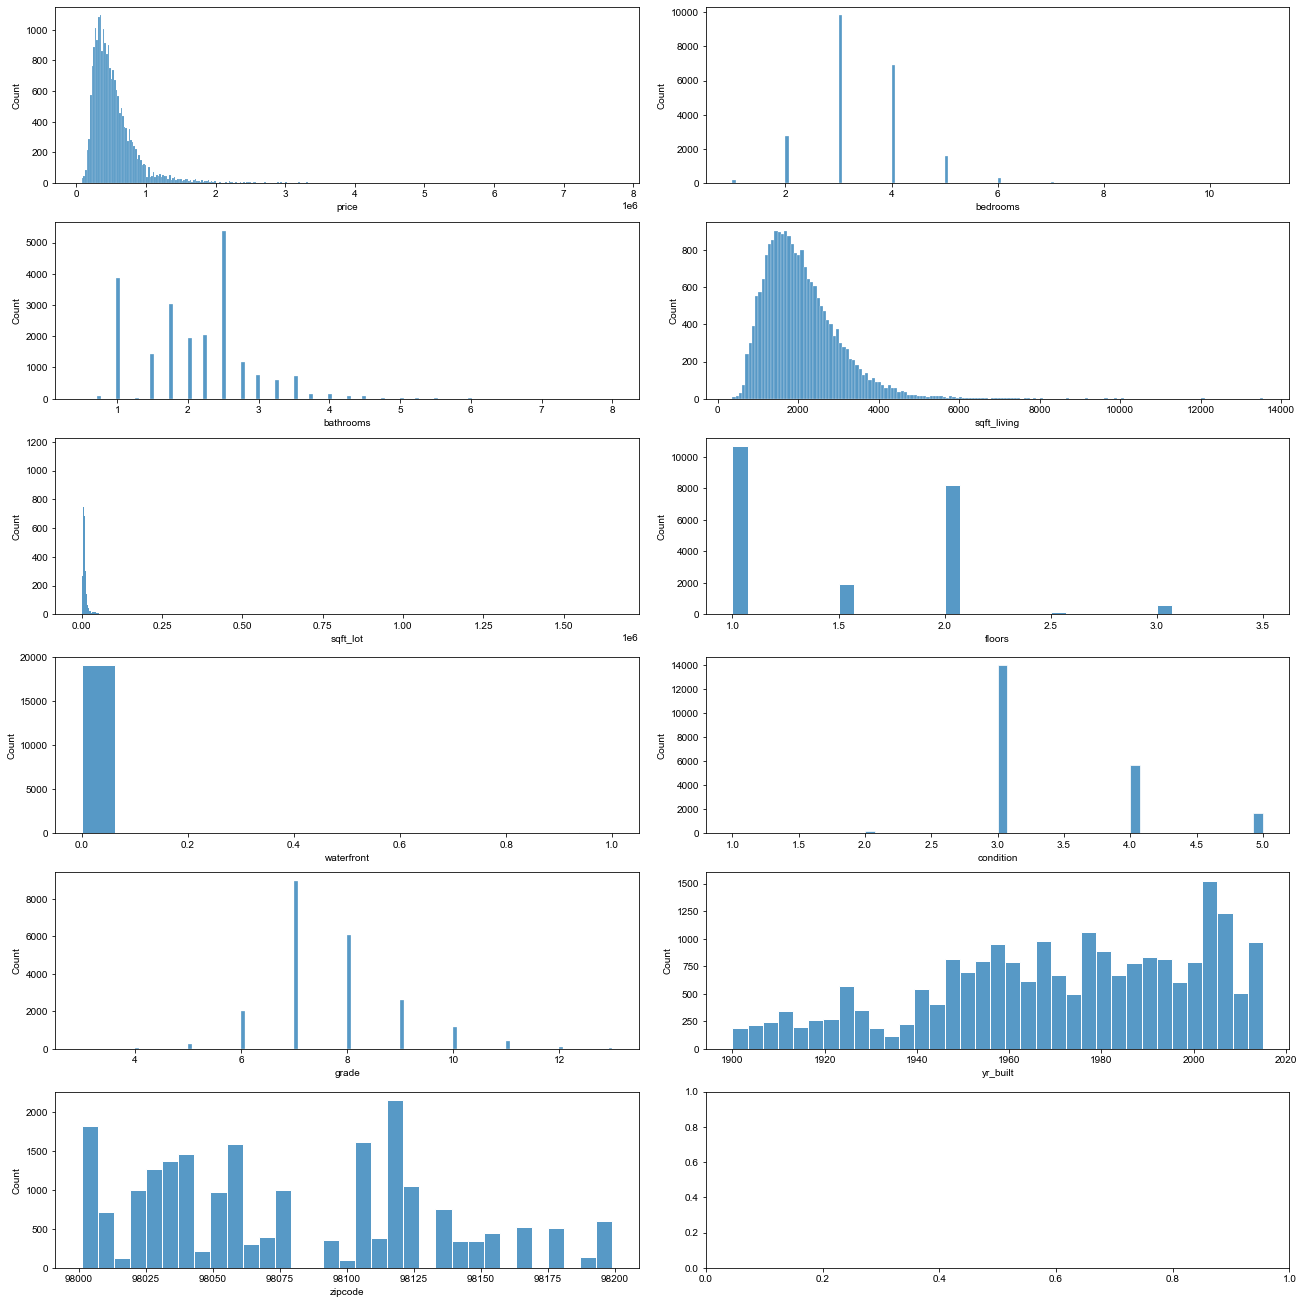

In [14]:
#Plotting each house feature's distribution
f, axes = plt.subplots(nrows=6, ncols=2, figsize=(18,18) ,constrained_layout=True)

for axx, column in zip(axes.flatten(), df.columns):
    sns.set_style("white")
    sns.histplot(x=df[column], data=df,ax=axx)

In [15]:
#Checking for outliers 
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['price'].quantile(q=q)))

0.9 percentile: 887000.0
0.91 percentile: 919994.5
0.92 percentile: 950000.0
0.93 percentile: 997967.5000000001
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0


In [16]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['sqft_living'].quantile(q=q)))

0.9 percentile: 3255.0
0.91 percentile: 3340.0
0.92 percentile: 3420.0
0.93 percentile: 3510.0
0.94 percentile: 3630.0
0.95 percentile: 3760.0
0.96 percentile: 3920.0
0.97 percentile: 4140.0
0.98 percentile: 4410.0


In [17]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['sqft_lot'].quantile(q=q)))

0.9 percentile: 21372.0
0.91 percentile: 24151.70000000002
0.92 percentile: 28506.400000000023
0.93 percentile: 34848.0
0.94 percentile: 37643.5
0.95 percentile: 43308.75
0.96 percentile: 50655.600000000006
0.97 percentile: 67384.89999999976
0.98 percentile: 107157.0


In [18]:
stats.kurtosis(df.sqft_living)

5.250278624437211

In [19]:
stats.skew(df.sqft_living)

1.4730409364724821

In [20]:
stats.skew(df.sqft_lot)

13.071406775919803

> We see a high positive skewness for the distribution of 'sqft_lot' values. This means that there are more values on the left side of the distribution mean than on the right side, which has a longer tail.

In [21]:
stats.kurtosis(df.sqft_lot)

285.4168446506654

> We also see a high kurtosis value for the distribution of 'sqft_lot' values, which indicates that this distribution has heavier tails than a normal distribution.
We will try to normalize the 'sqft_lot' distribution by log transformation.

In [22]:
loglot= np.log(df.sqft_lot)

In [23]:
stats.kurtosis(loglot)

3.3286839377382753

In [24]:
stats.skew(loglot)

0.9623750156615982

In [25]:
logliv= np.log(df.sqft_living)

In [26]:
stats.kurtosis(logliv)

-0.0793932778715023

In [27]:
stats.skew(logliv)

-0.027409771717033345

> It looks like log transfomation did not normalize the 'sqft_living' distribution.

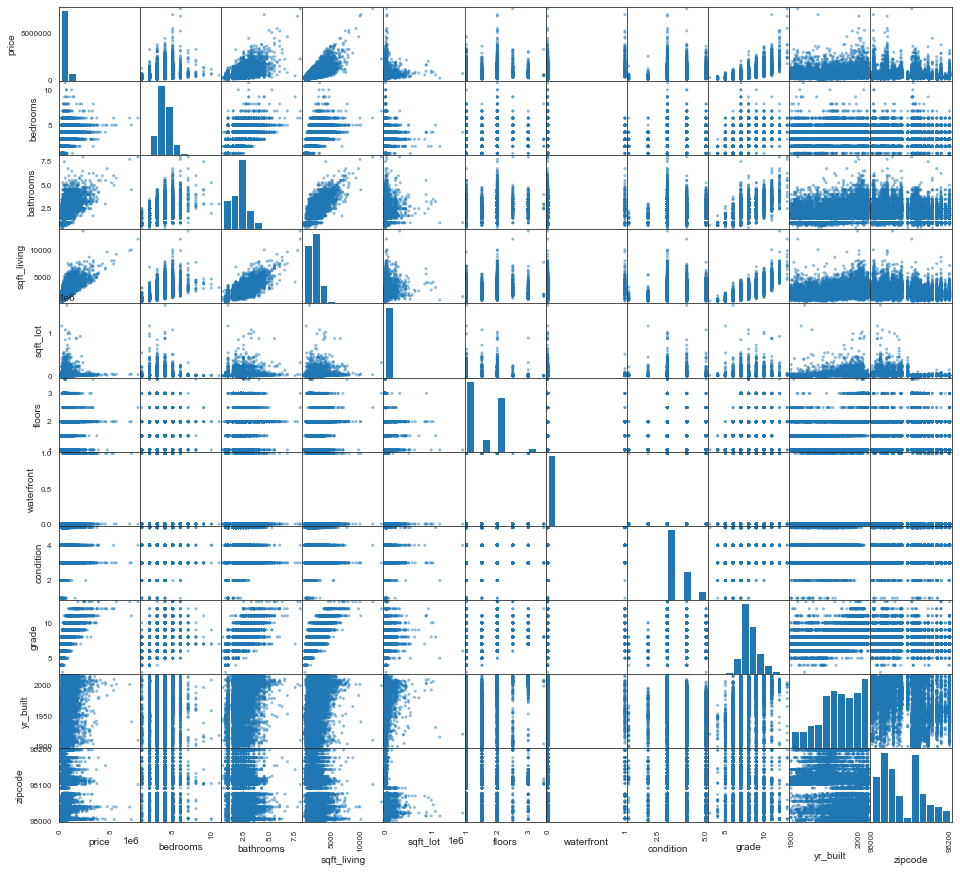

In [28]:
#Plotting scatter matrix for all house features
pd.plotting.scatter_matrix(df,figsize  = [16, 15]);

> We will now look for features that are most correlated with our target 'price'.

<AxesSubplot:>

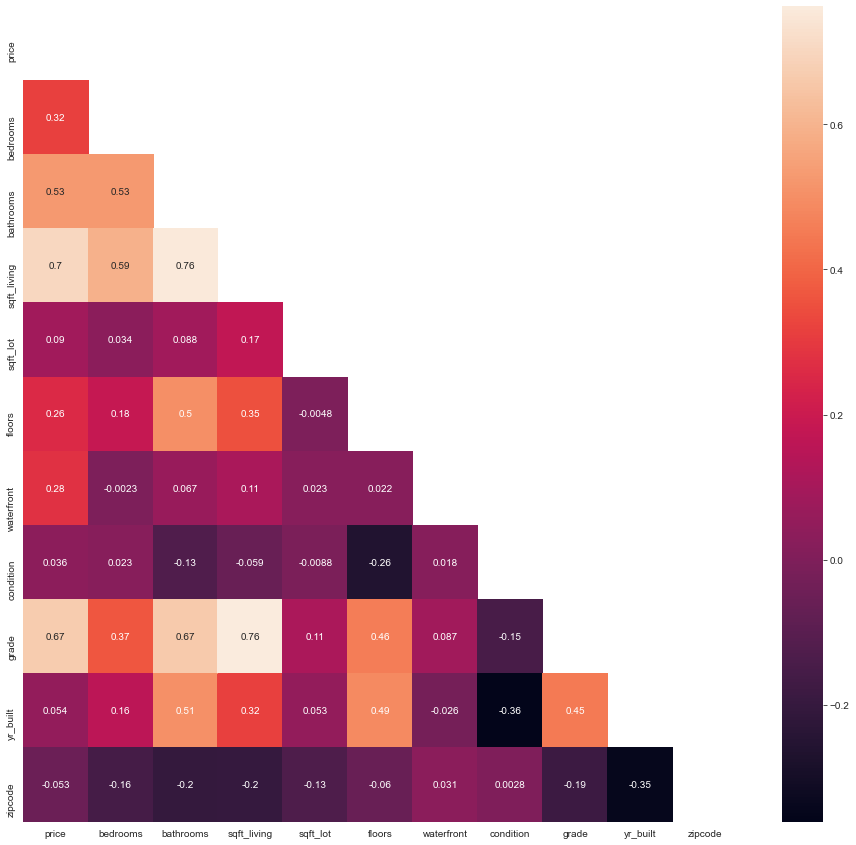

In [29]:
#Checking for correlation and multicollinearity 
corr= df.corr()
fig, axes = plt.subplots( figsize=(16,15))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype = bool)), annot=True)

> Based on the plot above, the most strongly correlated features with 'price' are 'sqft_living' and 'grade'.

In [30]:
print(abs(corr) > 0.60)

             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price         True     False      False         True     False   False   
bedrooms     False      True      False        False     False   False   
bathrooms    False     False       True         True     False   False   
sqft_living   True     False       True         True     False   False   
sqft_lot     False     False      False        False      True   False   
floors       False     False      False        False     False    True   
waterfront   False     False      False        False     False   False   
condition    False     False      False        False     False   False   
grade         True     False       True         True     False   False   
yr_built     False     False      False        False     False   False   
zipcode      False     False      False        False     False   False   

             waterfront  condition  grade  yr_built  zipcode  
price             False      False   True     Fa

> 'price' is highly correlated with 'sqft_living' and 'grade'.  <br />
> 'bathrooms' is also correlated with 'sqft_living' and 'grade' so should avoid to minimize multicollinearity.  

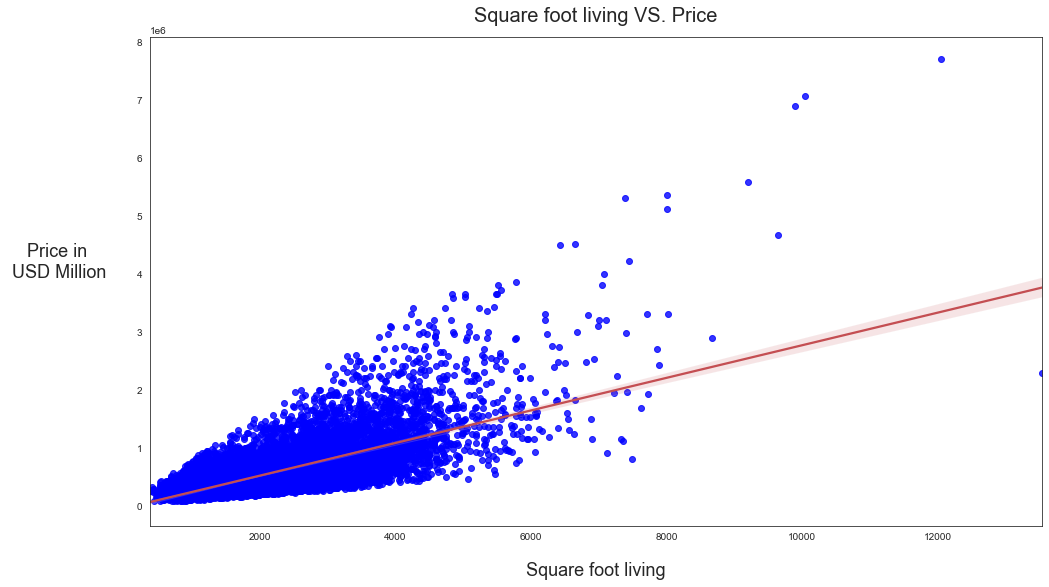

In [31]:
#Plotting 'sqft_living' vs. 'price'
sns.set_style("white")
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
sns.set(font_scale=1.4)

sns.regplot( 
        x=df['sqft_living'],
        y=df['price'],
        ci=99,
        scatter_kws={"color": "blue"}, line_kws={"color": "r"})

ax.set_xlabel("Square foot living", fontsize=18, labelpad=20)
ax.set_ylabel("Price in\n USD Million", fontsize=18, labelpad=80, rotation=0)
ax.set_title("Square foot living VS. Price", fontsize=20, pad=15);


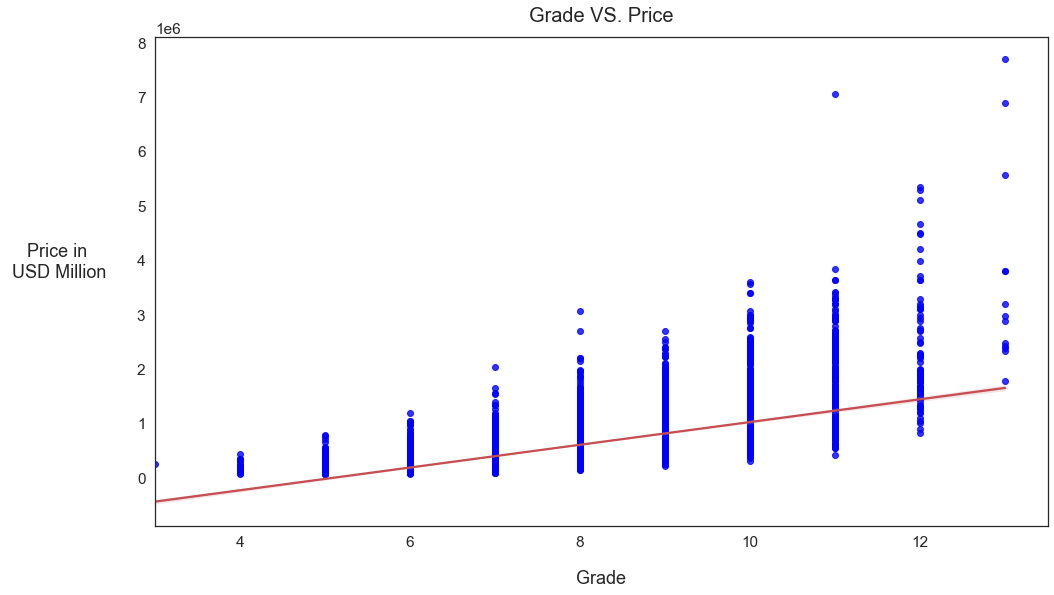

In [32]:
#Plotting 'grade' vs. 'price'
sns.set_style("white")
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
sns.set(font_scale=1.4)
sns.regplot( 
        x=df['grade'],
        y=df['price'],
        ci=99,
        scatter_kws={"color": "blue"}, line_kws={"color": "r"}
    )
ax.set(xlim=(3, 13.5))
ax.set_xlabel("Grade", fontsize=18, labelpad=20)
ax.set_ylabel("Price in\n USD Million", fontsize=18, labelpad=80, rotation=0)
ax.set_title("Grade VS. Price", fontsize=20, pad=15);

> We will check which features have a linear relationship with 'price'. <br />
> 'sqft_living' as well as 'grade' have the highest correlation coefficient and look the most linear with 'price'.<br />

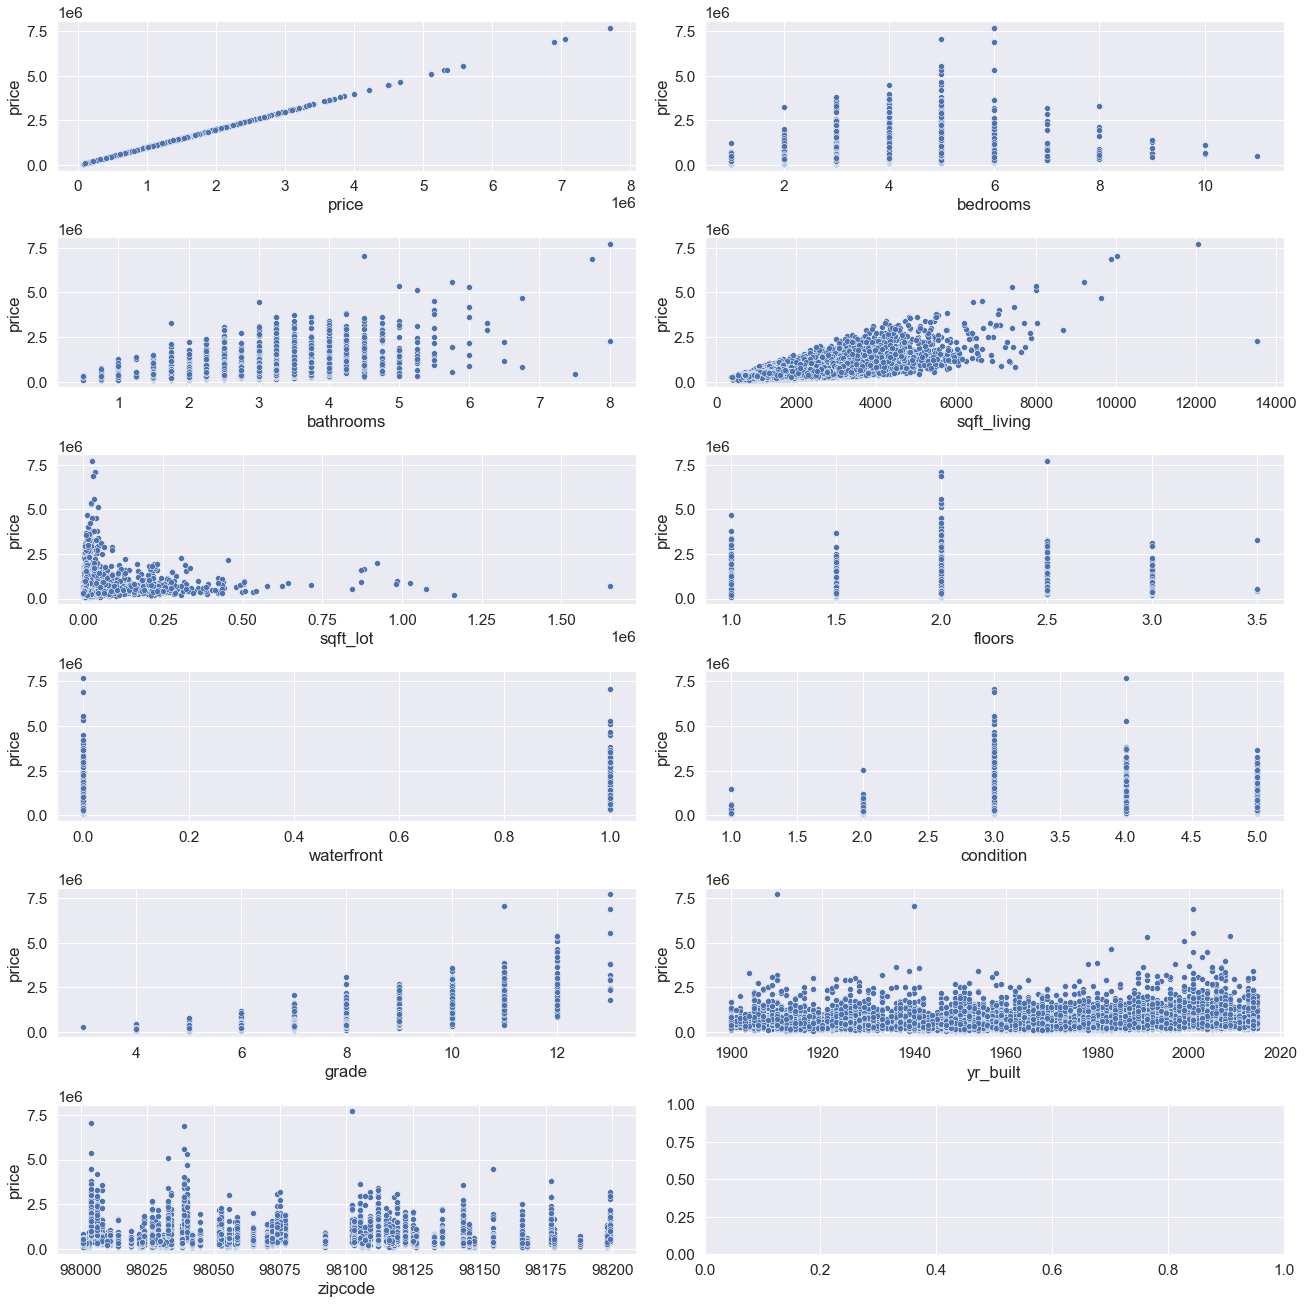

In [33]:
#Plotting scatterplots of each feature vs 'price'
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(18,18) ,constrained_layout=True)

for axx, column in zip(axes.flatten(), df.columns):
    sns.set_style("white")
    sns.scatterplot(x=df[column], y= df['price'], data=df,ax=axx) 

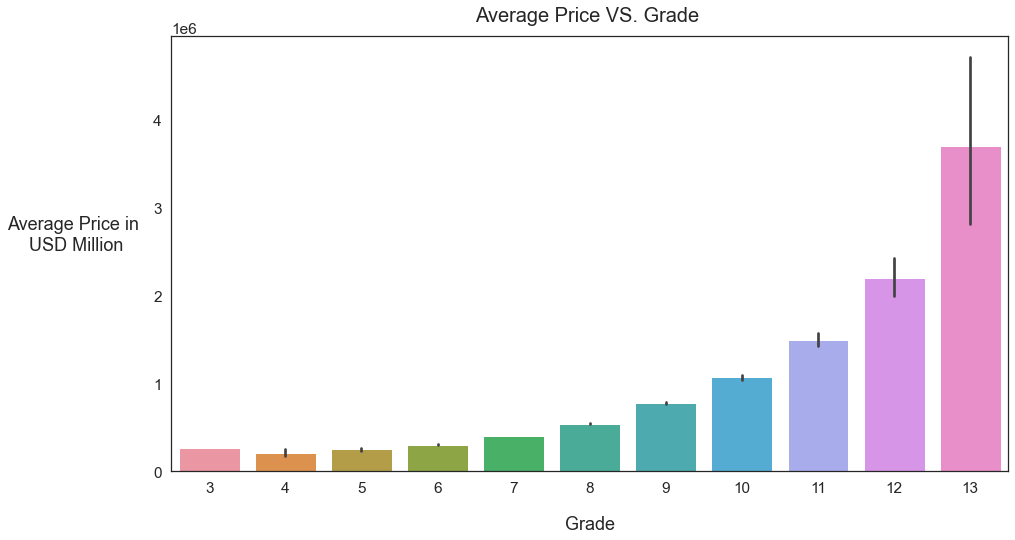

In [34]:
#Plotting average price vs. 'grade'
fig, ax = plt.subplots(figsize=(15,8))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x=df['grade'],y=df['price'], data=df)

ax.set_xlabel("Grade", fontsize=18, labelpad=20)
ax.set_ylabel("Average Price in\n USD Million", fontsize=18, labelpad=80, rotation=0)
ax.set_title("Average Price VS. Grade ", fontsize=20, pad=15);
#plt.savefig('price_vs_grade.png', dpi=100, bbox_inches='tight')

In [35]:
bins = [350,1350,2350,3350,4350,5350,6350,7350,8350,9350,14000]
labels = [1,2,3,4,5,6,7,8,9,10]
df['sqft_living_binned'] = pd.cut(df['sqft_living'], bins,labels=labels, include_lowest = True)

Text(0.5, 1.0, 'Average Price VS. Footage of the Home')

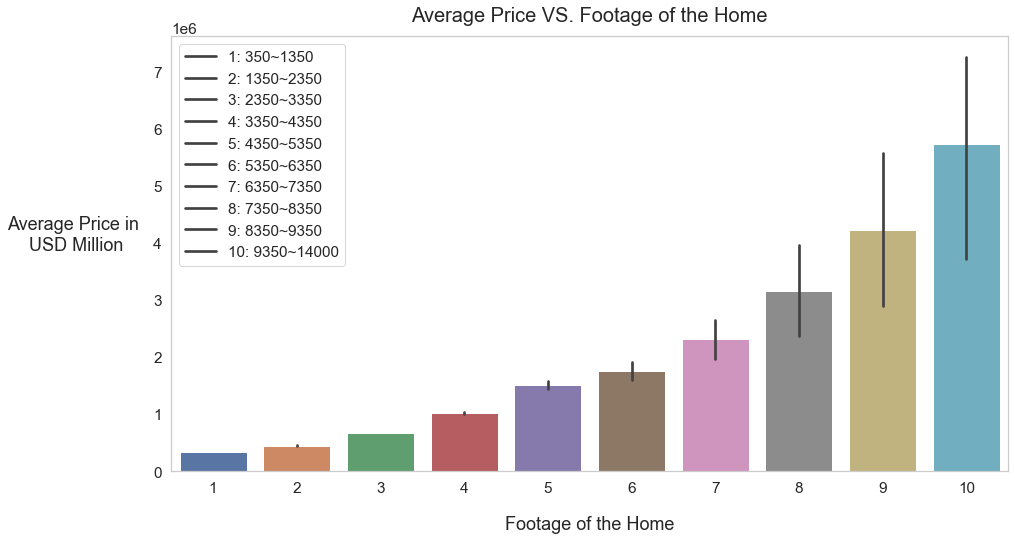

In [36]:
#Plotting average price vs. 'sqft_living'
fig, ax = plt.subplots(figsize=(15,8))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x=df['sqft_living_binned'],y=df['price'], data=df)

ax.set_xlabel("Footage of the Home", fontsize=18, labelpad=20)
ax.set_ylabel("Average Price in\n USD Million", fontsize=18, labelpad=80, rotation=0)

plt.legend(labels=['1: 350~1350', '2: 1350~2350', '3: 2350~3350','4: 3350~4350','5: 4350~5350','6: 5350~6350','7: 6350~7350','8: 7350~8350', '9: 8350~9350', '10: 9350~14000'])
ax.set_title("Average Price VS. Footage of the Home",fontsize=20, pad=15)
#plt.savefig('sqft_living_vs_price.png', dpi=100, bbox_inches='tight')

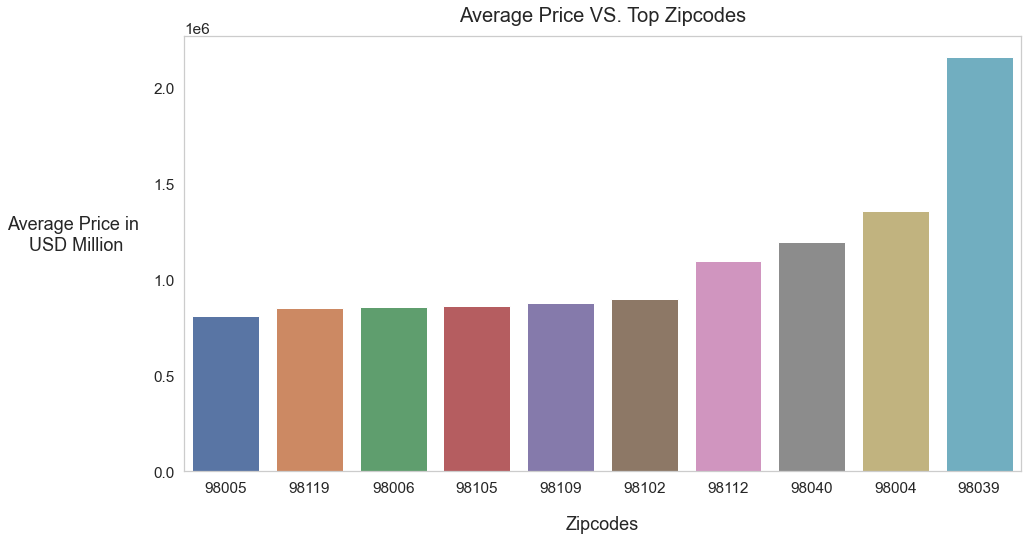

In [37]:
#Plotting average price vs. top zipcodes
top_zip= df.groupby(['zipcode'])['price'].mean().sort_values(ascending= False).head(10)
df_top_zip= pd.DataFrame(top_zip, columns =['price'])
df_top_zip.reset_index(inplace = True)

fig, ax = plt.subplots(figsize=(15,8))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x=df_top_zip['zipcode'],y=df_top_zip['price'], data=df_top_zip, order=df_top_zip.sort_values('price').zipcode)

ax.set_xlabel("Zipcodes", fontsize=18, labelpad=20)
ax.set_ylabel("Average Price in\n USD Million", fontsize=18, labelpad=80, rotation=0)
ax.set_title("Average Price VS. Top Zipcodes", fontsize=20, pad=15);
#plt.savefig('zipcdoe_vs_price.png', dpi=100, bbox_inches='tight')

# Data Preparation

In [38]:
df.waterfront.fillna(value=0, inplace = True)

In [39]:
df.isna().sum()

price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
condition             0
grade                 0
yr_built              0
zipcode               0
sqft_living_binned    0
dtype: int64

In [40]:
x=df.drop('price', axis=1).copy()
y=df['price']

In [41]:
#Spliting data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)

In [42]:
x_train.isna().sum()

bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
condition             0
grade                 0
yr_built              0
zipcode               0
sqft_living_binned    0
dtype: int64

In [43]:
#pd.set_option("display.max_rows", 66, "display.max_columns", 66)
train= pd.concat([x_train, y_train], axis =1)
corr= train.corr()
df=corr.abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[abs(df['cc'] > 0.6)]

,cc
pairs,
"(bedrooms, bedrooms)",1.000000
"(grade, sqft_living)",0.761402
"(bathrooms, sqft_living)",0.756021
"(sqft_living, price)",0.698616
"(bathrooms, grade)",0.667317
"(price, grade)",0.664722


In [44]:
#Testing for VIF
vif = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
pd.Series(vif, index=x_train.columns, name="Variance Inflation Factor")            

bedrooms                25.066732
bathrooms               27.469003
sqft_living             86.344200
sqft_lot                 1.176731
floors                  13.666681
waterfront               1.028730
condition               33.386036
grade                  126.812545
yr_built              7567.467192
zipcode               7353.408088
sqft_living_binned      69.214799
Name: Variance Inflation Factor, dtype: float64

In [45]:
x_train.isna().sum()

bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
condition             0
grade                 0
yr_built              0
zipcode               0
sqft_living_binned    0
dtype: int64

> We saw that 'bathrooms' was correlated with 'sqft_living' and 'grade'. When those two are correlated with 'price', 'bathrooms' has a high VIF as well. Thus, we will drop 'bathrooms' in order to eliminate multicollinearity. 

In [46]:
#Seperating two types of predictors 
categorical=['bedrooms','floors','waterfront', 'grade', 'zipcode']
con = ['sqft_living','sqft_lot']

In [47]:
#Creating dummie variables for categorical data
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(x_train[categorical])
dummies_encoded_train_all = ohe.transform(x_train[categorical])
dummies_encoded_train_all = pd.DataFrame(dummies_encoded_train_all, columns=ohe.get_feature_names(categorical), index=x_train.index)

In [48]:
#Transforming test dummies
dummies_encoded_test_all= ohe.transform(x_test[categorical])
dummies_encoded_test_all = pd.DataFrame(dummies_encoded_test_all, columns=ohe.get_feature_names(categorical),index=x_test.index )

In [49]:
x_test['log_sqft_lot']= np.log(x_test['sqft_lot'])
x_train['log_sqft_lot']= np.log(x_train['sqft_lot'])

<ipython-input-49-4b22c8ae8862>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['log_sqft_lot']= np.log(x_test['sqft_lot'])
<ipython-input-49-4b22c8ae8862>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['log_sqft_lot']= np.log(x_train['sqft_lot'])


In [50]:
x_train_final = pd.concat([x_train[['sqft_living','log_sqft_lot']],dummies_encoded_train_all], axis=1)
x_train_final.columns=[x.replace('.','_') for x in x_train_final.columns]

In [51]:
x_test_final = pd.concat([x_test[['sqft_living','log_sqft_lot']],dummies_encoded_test_all], axis=1)
x_test_final.columns=[x.replace('.','_') for x in x_test_final.columns]

In [52]:
train_final= pd.concat([x_train_final,y_train], axis=1)

# Data Modeling

In [53]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train, y_train)
DummyRegressor()
dummy_regr.predict(x_train)
dummy_regr.score(x_train, y_train)

0.0

## 1. Baseline Model:   price vs. sqft_living

Now, we will build and evaluate a linear regression model using the most correlated feature 'sqft_living', which will serve as our baseline model.

In [54]:
baseline_model = LinearRegression()
baseline_model.fit(x_train[['sqft_living']], y_train)
baseline_model.score(x_train[['sqft_living']], y_train)

0.4880645374199807

In [55]:
baseline_model.score(x_test[['sqft_living']], y_test)

0.5116624366066751

In [56]:
cross_val_score(baseline_model, x_train[['sqft_living']],y_train, cv=5).mean()

0.48650357109713643

In [57]:
#Root mean squared error
train_mse= mean_squared_error(y_train, baseline_model.predict(x_train[['sqft_living']]), squared=False)
test_mse= mean_squared_error(y_test, baseline_model.predict(x_test[['sqft_living']]), squared=False)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 263517.83595589775
Test Mean Squarred Error: 254082.36364077116


In [58]:
#Overfitting if large difference between test and train mse 
abs(train_mse-test_mse)/train_mse

0.035805820432988494

In [59]:
y_hat_train = baseline_model.predict(x_train[['sqft_living']])
y_hat_test = baseline_model.predict(x_test[['sqft_living']])

Text(0.5, 1.0, 'test')

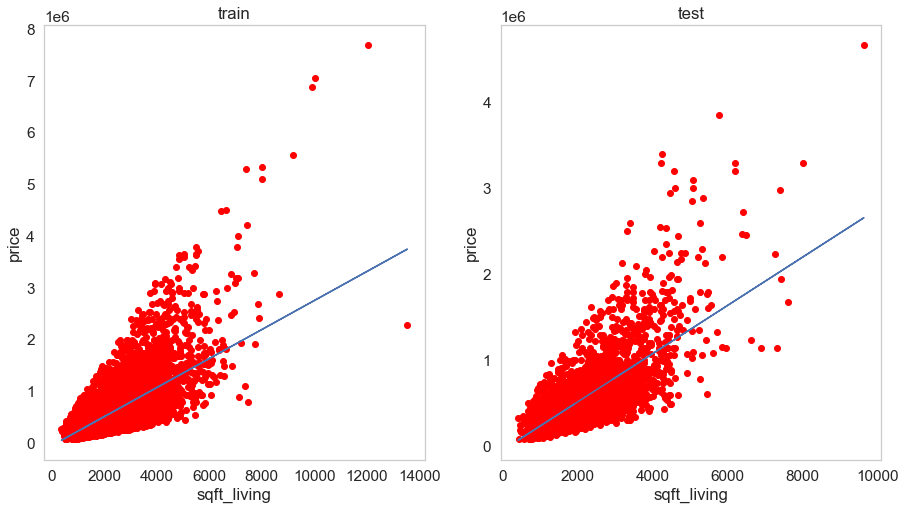

In [60]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.scatter(x_train[['sqft_living']], y_train, color = "red")
plt.plot(x_train[['sqft_living']] ,y_hat_train)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('train')

plt.subplot(1,2,2)
plt.scatter(x_test[['sqft_living']], y_test, color = "red")
plt.plot(x_test[['sqft_living']] ,y_hat_test)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('test')

#plt.savefig('base_model_reg.png', dpi=100, bbox_inches='tight')

In [61]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

print('Average Train Residuals/Bias:', train_residuals.mean())
print('Average Test Residuals/Bias:', test_residuals.mean())

Average Train Residuals/Bias: -2.319243076509915e-11
Average Test Residuals/Bias: -3533.7889243886752


In [62]:
var_train = np.var(y_hat_train) 
var_test = np.var(y_hat_test) 
print('Train Prediciton Variance:', var_train)
print('Test Prediciton Variance:', var_test)

Train Prediciton Variance: 66203670574.318184
Test Prediciton Variance: 66746174319.378456


In [63]:
#Checking the result with a different method
outcome = 'price'
predictors ='sqft_living'
formula = outcome + '~' + predictors
model2 = ols(formula=formula, data=train_final).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                 1.647e+04
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:59:45   Log-Likelihood:            -2.4015e+05
No. Observations:               17276   AIC:                         4.803e+05
Df Residuals:                   17274   BIC:                         4.803e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.392e+04   4968.276     -8.839      0.000   -5.37e+04   -3.42e+04
sqft_living   280.4830      2.186    128.330      0.000     276.199     284.767
==============================================================================
Omnibus:                    12487.387   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           539600.256
Skew:                           2.998   Prob(JB):                         0.00
Kurtosis:                      29.714   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

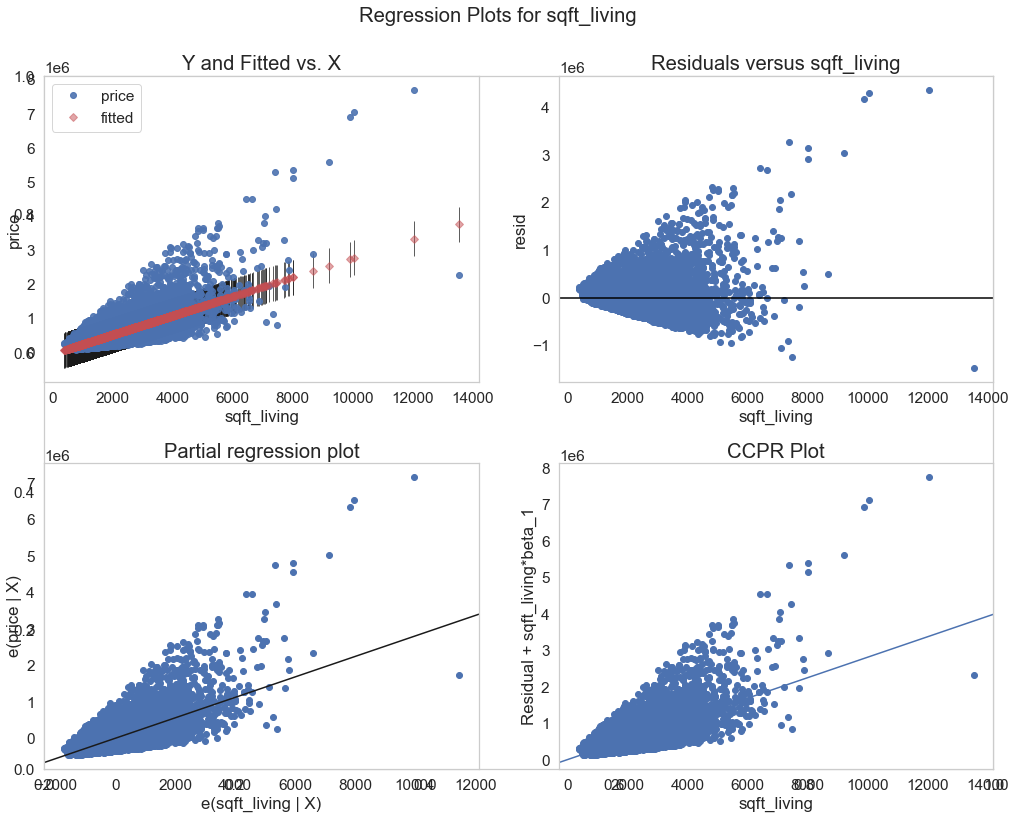

In [64]:
#Regression plots for 'sqft_living'
fig, axes = plt.subplots(figsize=(15,12))
fig = sm.graphics.plot_regress_exog(model2, 'sqft_living', fig=fig)

> The scores above indicate that the baseline model is about 50% accurate. <br />We will now check whether the normality and homoscedasticity assumptions hold for the baseline model.

In [65]:
residuals = model2.resid

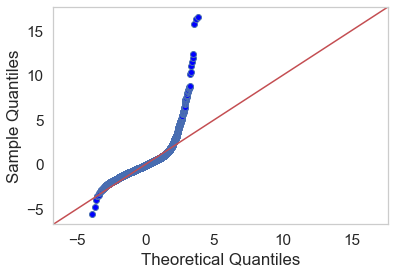

In [66]:
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

> Based on the above plot, the baseline model is violating the normality assumption. <br /> On the other hand, we see that our outliers are causing the problem. 

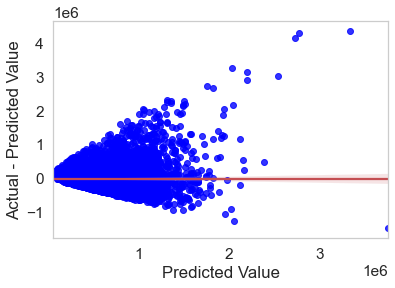

In [67]:
pred_train = model2.predict(x_train['sqft_living'])
fig, ax = plt.subplots()
ax= sns.regplot(x=pred_train, y=model2.resid, scatter_kws={"color": "blue"}, line_kws={"color": "r"})
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

> The plot above displays that the baseline model's errors are heteroscedastic and therefore it violates the linear regression assumption.

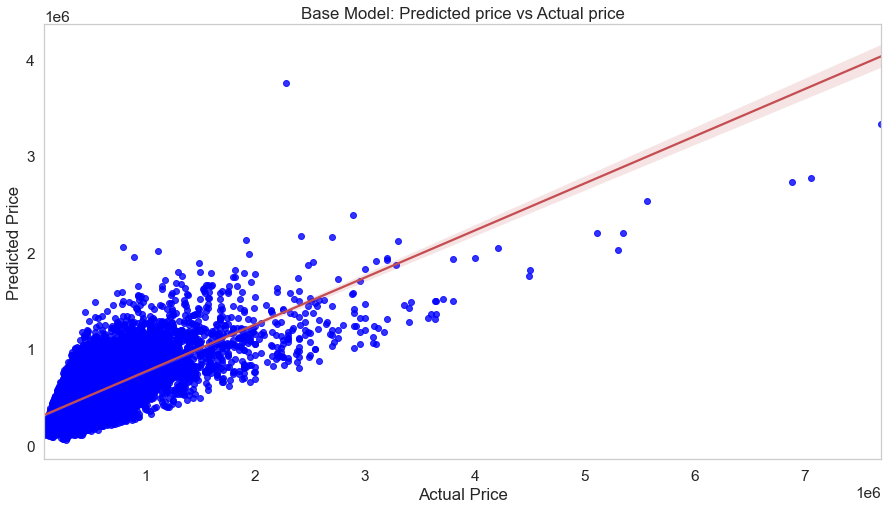

In [68]:
#Vertical distance between the points and the line denote the errors
fig, ax = plt.subplots(figsize=(15, 8))
ax= sns.regplot(x=y_train, y=pred_train, scatter_kws={"color": "blue"}, line_kws={"color": "r"})
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.set_title('Base Model: Predicted price vs Actual price');
#plt.savefig('train_base_model.png', dpi=100, bbox_inches='tight')

Text(0.5, 1.0, 'Predicted price vs Actual price')

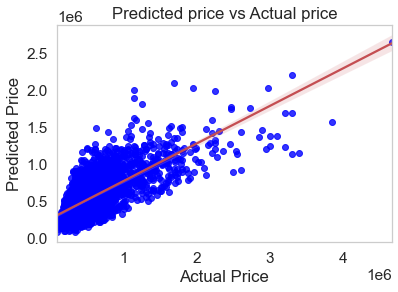

In [69]:
#Vertical distance between the points and the line denote the errors
pred_test = model2.predict(x_test['sqft_living'])
fig, ax = plt.subplots()
ax= sns.regplot(x=y_test, y=pred_test, scatter_kws={"color": "blue"}, line_kws={"color": "r"})
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.set_title('Predicted price vs Actual price')

### Standardized transformed sqft_living vs price

> We saw some outliers causing violations of the linear regression assumptions.  <br />We will try to standardize 'sqft_living' and see if it improves the model. 

In [70]:
scaler = StandardScaler()
x_train_sc1 = scaler.fit_transform(x_train[['sqft_living']])
x_test_sc1 = scaler.transform(x_test[['sqft_living']])

In [71]:
linreg1_t = LinearRegression()
linreg1_t.fit(x_train_sc1, y_train)
linreg1_t.score(x_train_sc1, y_train)

0.4880645374199807

> It looks like StandardScaler did not make any difference.<br /> Next, we will try polynomial transformation. 

### Polynomial transformed sqft_living vs price

degree 2 0.5428665308592373
degree 3 0.5438587685749856
degree 4 0.5364410353544797


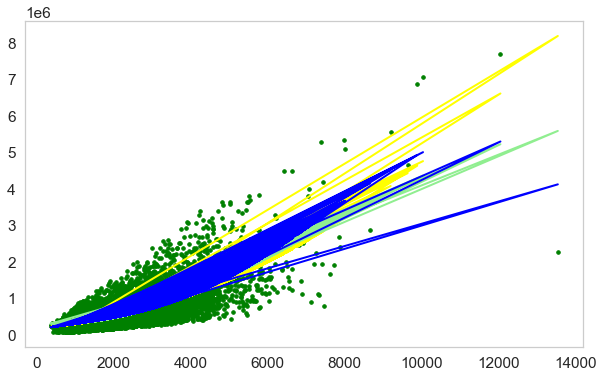

In [72]:
colors = ['yellow', 'lightgreen', 'blue']
plt.figure(figsize=(10, 6))
plt.scatter(x['sqft_living'], y, color='green', s=50, marker='.', label='plot points')

for index, degree in enumerate([2, 3, 4]):
    
    poly = PolynomialFeatures(degree)
    
    x_poly_train = poly.fit_transform(x_train[['sqft_living']])
    
    reg_poly = LinearRegression().fit(x_poly_train, y_train)
    
    x_poly_test = poly.transform(x_test[['sqft_living']])
     
    y_pred = reg_poly.predict(x_poly_test)
    
    print("degree %d" % degree, r2_score(y_test, y_pred))
    
    x_poly = poly.transform(x[['sqft_living']])
     
    y_poly = reg_poly.predict(x_poly)
    
    plt.plot(x['sqft_living'], y_poly, color = colors[index], linewidth=2, label='degree %d' % degree)
    

> We see that polynomial transformation seems to improve the model. 


## 2. Second Model: price vs. sqft_living & grade

We will add in the second feature 'grade', and compare that model's performance to the performance of the baseline model.


### Including a categorical variable grade 

In [73]:
linreg2 = LinearRegression()
linreg2.fit(x_train[['sqft_living','grade']], y_train)
linreg2.score(x_train[['sqft_living', 'grade']], y_train)

0.5300240594479888

### Standaziing the two independent variables 

In [74]:
scaler = StandardScaler()
x_train_sc2 = scaler.fit_transform(x_train[['sqft_living','grade']])

In [75]:
linreg2_t = LinearRegression()
linreg2_t.fit(x_train_sc2, y_train)
linreg2_t.score(x_train_sc2, y_train)

0.5300240594479888

### Turning grade into dummies and combining it with standardized sqft_living

In [76]:
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")
ohe.fit(x_train[['grade']])
dummies_encoded_train = ohe.transform(x_train[['grade']])
dummies_encoded_test = ohe.transform(x_test[['grade']])
dummies_encoded_train = pd.DataFrame(dummies_encoded_train, columns = ohe.get_feature_names(['grade']), index=x_train.index)
dummies_encoded_test = pd.DataFrame(dummies_encoded_test, columns = ohe.get_feature_names(['grade']), index=x_test.index)

In [77]:
x_train_living = pd.DataFrame(x_train_sc1, index=x_train.index)
x_test_living = pd.DataFrame(x_test_sc1, index=x_test.index)

In [78]:
x_train2 = pd.concat([x_train_living, dummies_encoded_train], axis=1)
#x_test2 = pd.concat([x_test_living, dummies_encoded_test], axis=1)

In [79]:
linreg2_t = LinearRegression()
linreg2_t.fit(x_train2, y_train)
linreg2_t.score(x_train2, y_train)

0.5810581312041051

### Dummies plus polynomial transformation 

In [80]:
poly = PolynomialFeatures(2)
    
x_poly_train = poly.fit_transform(x_train[['sqft_living']])
    
x_poly_test = poly.transform(x_test[['sqft_living']])
     
x_train_poly = pd.DataFrame(x_poly_train, index=x_train.index)
x_test_poly = pd.DataFrame(x_poly_test, index=x_test.index)
    
x_train3 = pd.concat([x_train_poly, dummies_encoded_train], axis=1)
x_test3 = pd.concat([x_test_poly, dummies_encoded_test], axis=1)


reg_poly = LinearRegression().fit(x_train3, y_train)
y_pred = reg_poly.predict(x_test3)
    
print("degree %d" % 2, r2_score(y_test, y_pred))

degree 2 0.5997761242996374


> Conclusion: Dummies and polynomial transformation have more positive effects on the model.

## 3. Final Predictive Model

We will create a final model using the best features and evaluate the model's results.


### Creating the final predictive model with all the independent variables selected 

In [81]:
model_all = LinearRegression()
model_all.fit(x_train_final, y_train)
cross_val_score(model_all, x_train_final, y_train, cv=5)

array([0.82451543, 0.80903122, 0.81470412, 0.82179899, 0.80501777])

In [82]:
model_all.score(x_test_final, y_test)

0.8159048110441636

In [83]:
outcome = 'price'
predictors = x_train_final
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_all2= ols(formula=formula, data=train_final).fit()
model_all2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     823.6
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:59:49   Log-Likelihood:            -2.3105e+05
No. Observations:               17276   AIC:                         4.623e+05
Df Residuals:                   17179   BIC:                         4.630e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.419e+05   1.58e+04     21.653      0.000    3.11e+05    3.73e+05
sqft_living      167.5032      2.628     63.740      0.000     162.352     172.654
log_sqft_lot    2.632e+04   1912.863     13.760      0.000    2.26e+04    3.01e+04
bedrooms_1      1.186e+05   2.15e+04      5.510      0.000    7.64e+04    1.61e+05
bedrooms_2      1.241e+05   1.81e+04      6.837      0.000    8.85e+04     1.6e+05
bedrooms_3      1.278e+05   1.78e+04      7.163      0.000    9.28e+04    1.63e+05
bedrooms_4      1.053e+05   1.78e+04      5.910      0.000    7.03e+04     1.4e+05
bedrooms_5      9.352e+04   1.81e+04      5.165      0.000     5.8e+04    1.29e+05
bedrooms_6        9.3e+04   2.01e+04      4.623      0.000    5.36e+04    1.32e+05
bedrooms_7     -1.107e+05   3.36e+04     -3.296      0.001   -1.77e+05   -4.49e+04
bedrooms_8      8.992e+04   4.87e+04      1.847      0.065   -5488.118    1.85e+05
bedrooms_9     -1.963e+05   6.63e+04     -2.961      0.003   -3.26e+05   -6.63e+04
bedrooms_10    -1.816e+05    8.4e+04     -2.162      0.031   -3.46e+05    -1.7e+04
bedrooms_11     7.841e+04   1.43e+05      0.547      0.584   -2.02e+05    3.59e+05
floors_1_0      5.255e+04   1.09e+04      4.810      0.000    3.11e+04     7.4e+04
floors_1_5      6.162e+04   1.12e+04      5.477      0.000    3.96e+04    8.37e+04
floors_2_0      4.593e+04   1.07e+04      4.293      0.000     2.5e+04    6.69e+04
floors_2_5      1.067e+05   1.57e+04      6.790      0.000    7.59e+04    1.38e+05
floors_3_0      6466.9761    1.2e+04      0.537      0.591   -1.72e+04    3.01e+04
floors_3_5       6.86e+04   5.47e+04      1.254      0.210   -3.87e+04    1.76e+05
waterfront_0_0 -2.548e+05   9229.523    -27.604      0.000   -2.73e+05   -2.37e+05
waterfront_1_0  5.967e+05   1.22e+04     49.014      0.000    5.73e+05    6.21e+05
grade_4        -3.148e+05   3.28e+04     -9.611      0.000   -3.79e+05   -2.51e+05
grade_5        -3.466e+05   1.29e+04    -26.874      0.000   -3.72e+05   -3.21e+05
grade_6        -3.486e+05   8140.967    -42.820      0.000   -3.65e+05   -3.33e+05
grade_7        -3.485e+05   7033.086    -49.553      0.000   -3.62e+05   -3.35e+05
grade_8        -3.136e+05   6729.325    -46.608      0.000   -3.27e+05      -3e+05
grade_9        -2.332e+05   7027.278    -33.185      0.000   -2.47e+05   -2.19e+05
grade_10       -1.071e+05   8058.697    -13.296      0.000   -1.23e+05   -9.14e+04
grade_11        1.056e+05   1.07e+04      9.853      0.000    8.46e+04    1.27e+05
grade_12        5.677e+05    1.9e+04     29.844      0.000     5.3e+05    6.05e+05
grade_13        1.681e+06   4.28e+04     39.313      0.000     1.6e+06    1.76e+06
zipcode_98001  -2.089e+05   9167.704    -22.786      0.000   -2.27e+05   -1.91e+05
zipcode_98002   -1.85e+05   1.24e+04    -14.925      0.000   -2.09e+05   -1.61e+05
zipcode_9800

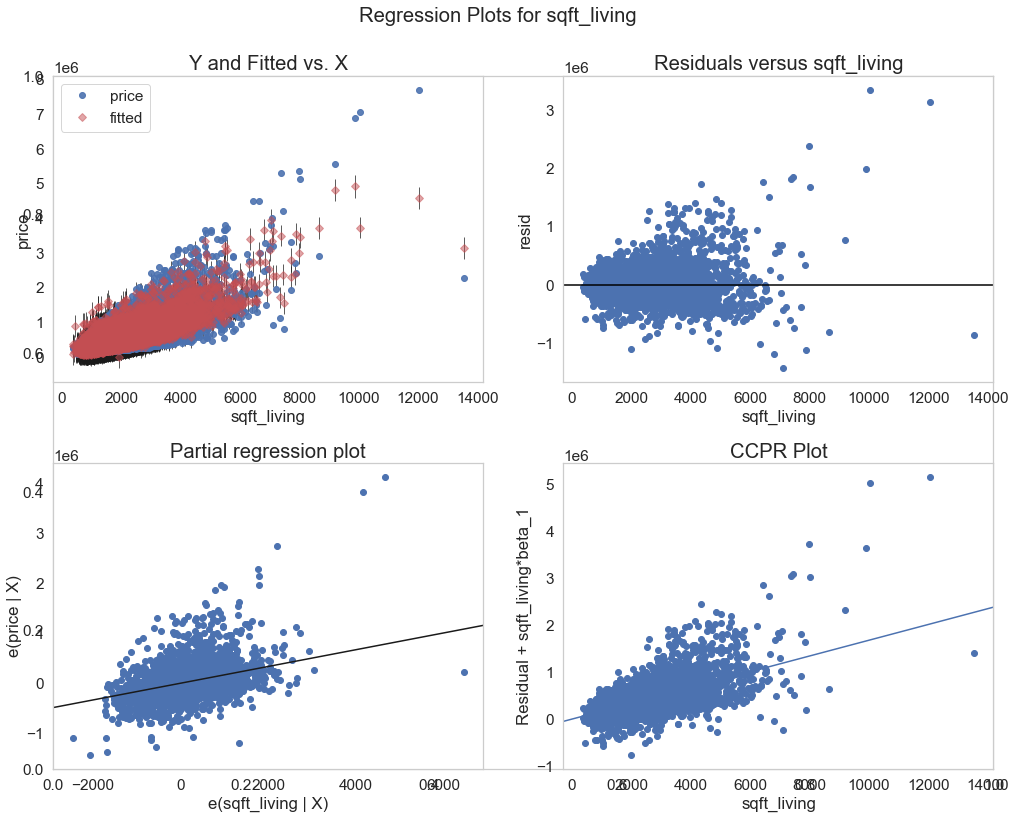

In [84]:
fig, axes = plt.subplots(figsize=(15,12))
fig = sm.graphics.plot_regress_exog(model_all2,'sqft_living', fig=fig)

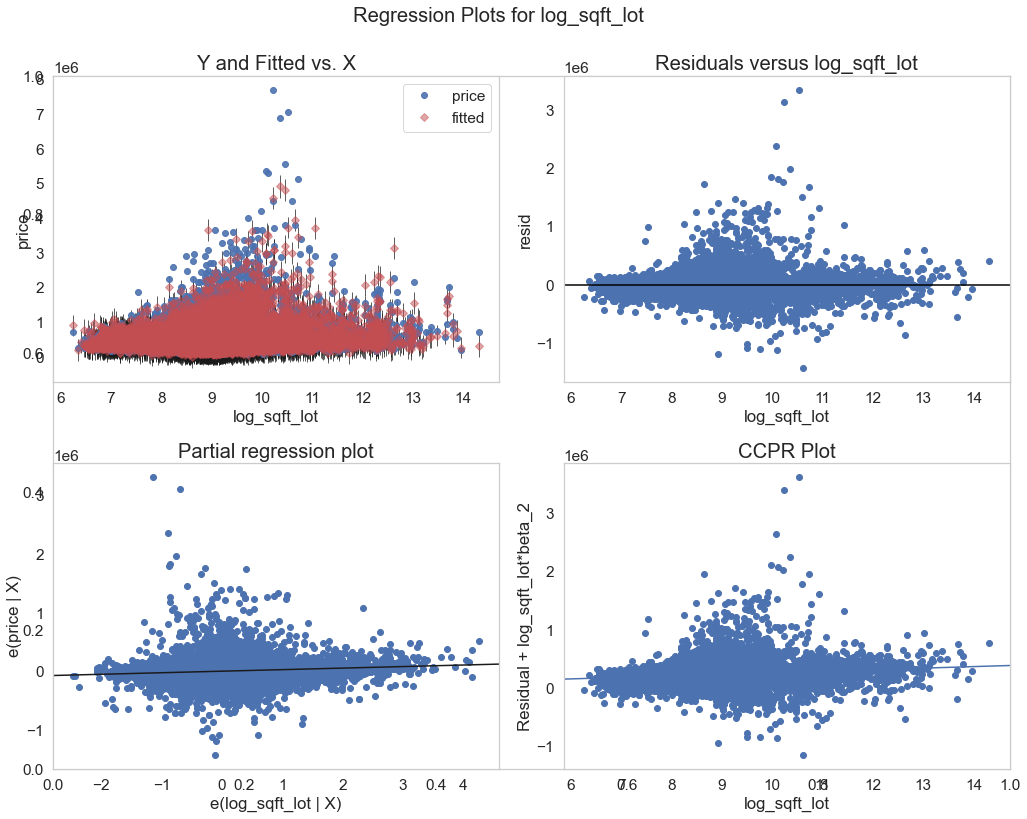

In [85]:
fig, axes = plt.subplots(figsize=(15,12))
fig = sm.graphics.plot_regress_exog(model_all2,'log_sqft_lot', fig=fig)

### Selecting only the ones that are statistically significant 

In [86]:
summary = model_all2.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols)

102 93
['sqft_living', 'log_sqft_lot', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_9', 'bedrooms_10', 'floors_1_0', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'waterfront_0_0', 'waterfront_1_0', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',

In [87]:
outcome = 'price'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_all3 = ols(formula=formula, data=train_final).fit()
model_all3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     868.8
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:59:52   Log-Likelihood:            -2.3105e+05
No. Observations:               17276   AIC:                         4.623e+05
Df Residuals:                   17184   BIC:                         4.630e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.121e+05   3.25e+04     12.684      0.000    3.48e+05    4.76e+05
sqft_living      167.2382      2.622     63.772      0.000     162.098     172.378
log_sqft_lot    2.588e+04   1900.155     13.620      0.000    2.22e+04    2.96e+04
bedrooms_1      2.386e+04   4.93e+04      0.484      0.629   -7.28e+04    1.21e+05
bedrooms_2       2.91e+04   4.76e+04      0.611      0.541   -6.42e+04    1.22e+05
bedrooms_3      3.333e+04   4.75e+04      0.702      0.482   -5.97e+04    1.26e+05
bedrooms_4      1.088e+04   4.74e+04      0.229      0.819    -8.2e+04    1.04e+05
bedrooms_5      -785.8068   4.75e+04     -0.017      0.987   -9.38e+04    9.23e+04
bedrooms_6      -942.1962   4.84e+04     -0.019      0.984   -9.58e+04     9.4e+04
bedrooms_7     -2.045e+05   5.66e+04     -3.612      0.000   -3.16e+05   -9.35e+04
bedrooms_9     -2.902e+05   8.46e+04     -3.431      0.001   -4.56e+05   -1.24e+05
bedrooms_10    -2.757e+05   1.02e+05     -2.709      0.007   -4.75e+05   -7.62e+04
floors_1_0      4.531e+04   8372.368      5.412      0.000    2.89e+04    6.17e+04
floors_1_5      5.453e+04   8936.576      6.102      0.000     3.7e+04     7.2e+04
floors_2_0       3.87e+04   8076.980      4.791      0.000    2.29e+04    5.45e+04
floors_2_5       9.96e+04    1.6e+04      6.220      0.000    6.82e+04    1.31e+05
waterfront_0_0 -2.199e+05   1.68e+04    -13.118      0.000   -2.53e+05   -1.87e+05
waterfront_1_0   6.32e+05   1.88e+04     33.533      0.000    5.95e+05    6.69e+05
grade_4        -3.083e+05   3.29e+04     -9.372      0.000   -3.73e+05   -2.44e+05
grade_5        -3.399e+05   1.32e+04    -25.839      0.000   -3.66e+05   -3.14e+05
grade_6        -3.418e+05   8525.185    -40.099      0.000   -3.59e+05   -3.25e+05
grade_7         -3.42e+05   7465.449    -45.809      0.000   -3.57e+05   -3.27e+05
grade_8        -3.069e+05   7188.218    -42.694      0.000   -3.21e+05   -2.93e+05
grade_9        -2.265e+05   7507.567    -30.166      0.000   -2.41e+05   -2.12e+05
grade_10       -1.004e+05   8524.951    -11.783      0.000   -1.17e+05   -8.37e+04
grade_11        1.125e+05   1.11e+04     10.126      0.000    9.07e+04    1.34e+05
grade_12         5.76e+05   1.92e+04     30.028      0.000    5.38e+05    6.14e+05
grade_13        1.689e+06   4.29e+04     39.349      0.000    1.61e+06    1.77e+06
zipcode_98001  -2.143e+05   1.01e+04    -21.171      0.000   -2.34e+05   -1.94e+05
zipcode_98002  -1.907e+05   1.32e+04    -14.421      0.000   -2.17e+05   -1.65e+05
zipcode_98003    -2.2e+05   1.12e+04    -19.567      0.000   -2.42e+05   -1.98e+05
zipcode_98004   5.708e+05   1.08e+04     52.691      0.000     5.5e+05    5.92e+05
zipcode_98005    8.92e+04   1.39e+04      6.413      0.000    6.19e+04    1.16e+05
zipcode_98006   5.671e+04   9004.770      6.297      0.000    3.91e+04    7.44e+04
zipcode_9800

> Removing the insignificant variables did not improve the adjusted R-squared.

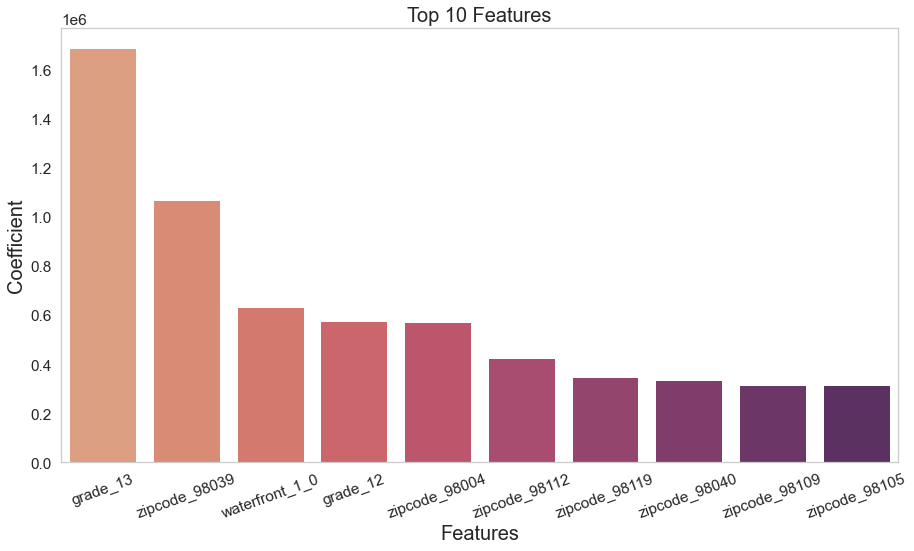

In [88]:
#Plotting the features with the highest coefficients 
sns.set_style("whitegrid", {'axes.grid' : False})
model_coef = model_all3.params.sort_values(ascending=False).head(11)

model_largest2 =pd.DataFrame(model_coef, columns =['coefficient'])
model_largest2.drop('Intercept', axis=0, inplace= True)
plt.figure(figsize = (15,8))
a= sns.barplot(data=model_largest2, x=model_largest2.index, y= 'coefficient', palette="flare")
plt.xlabel('Features', size=20)
plt.ylabel('Coefficient', size=20)
plt.title('Top 10 Features', size=20)
plt.xticks(rotation=20);
#plt.savefig('coefficent.png', dpi=100, bbox_inches='tight')

### Applying the feature selection tool 

In [89]:
splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
testmodel = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(testmodel, cv=splitter)
selector.fit(x_train_final,y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(x_train_final.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
sqft_living: True
log_sqft_lot: True
bedrooms_1: True
bedrooms_2: True
bedrooms_3: True
bedrooms_4: True
bedrooms_5: True
bedrooms_6: True
bedrooms_7: True
bedrooms_8: True
bedrooms_9: True
bedrooms_10: True
bedrooms_11: True
floors_1_0: True
floors_1_5: True
floors_2_0: True
floors_2_5: True
floors_3_0: True
floors_3_5: True
waterfront_0_0: True
waterfront_1_0: True
grade_4: True
grade_5: True
grade_6: True
grade_7: True
grade_8: True
grade_9: True
grade_10: True
grade_11: True
grade_12: True
grade_13: True
zipcode_98001: True
zipcode_98002: True
zipcode_98003: True
zipcode_98004: True
zipcode_98005: True
zipcode_98006: True
zipcode_98007: True
zipcode_98008: True
zipcode_98010: True
zipcode_98011: True
zipcode_98014: True
zipcode_98019: True
zipcode_98022: True
zipcode_98023: True
zipcode_98024: True
zipcode_98027: True
zipcode_98028: True
zipcode_98029: True
zipcode_98030: True
zipcode_98031: True
zipcode_98032: True
zipcode_98033: True
zipcode_98034: True
z

In [90]:
#Running a regression of the columns selected by feature se
linreg = LinearRegression()
selected_columns = x_train_final.columns[selector.support_]
linreg.fit(x_train_final[selected_columns],y_train)
estimators = selector.estimator_
print(estimators.score(x_train_final[selected_columns],y_train))

0.8215140924874984


> We see the same result with various methods. 

### Applying Polynomial transformation on the final test data set

In [91]:
poly = PolynomialFeatures(3)

x_poly_train_final = poly.fit_transform(x_train_final[['sqft_living','log_sqft_lot']])
    
x_poly_test_final = poly.transform(x_test_final[['sqft_living','log_sqft_lot']])
     
x_train_poly_final = pd.DataFrame(x_poly_train_final, index=x_train_final.index)
x_test_poly_final = pd.DataFrame(x_poly_test_final, index=x_test_final.index)
    
x_train_final_model = pd.concat([x_train_poly_final, dummies_encoded_train_all], axis=1)
x_test_final_model = pd.concat([x_test_poly_final, dummies_encoded_test_all], axis=1)

reg_poly_final = LinearRegression().fit(x_train_final_model, y_train)

y_pred_train_final = reg_poly_final.predict(x_train_final_model)
y_pred_test_final = reg_poly_final.predict(x_test_final_model)

print("degree %d" % 3, r2_score(y_train, y_pred_train_final))
print("degree %d" % 3, r2_score(y_test, y_pred_test_final))

degree 3 0.8391815664303052
degree 3 0.8264350848235849


In [92]:
reg_poly_final.intercept_

-6749244.239232769

In [93]:
coef_dict={}

for column_name, coefficient in zip(x_train_final_model.columns, reg_poly_final.coef_):
    coef_dict[column_name]= coefficient
sorted(coef_dict.items(), key=lambda x: x[1], reverse=True)

[(0, 3699752.2547057844),
 (2, 1132500.4317912282),
 ('zipcode_98039', 1040142.5426067632),
 ('grade_13', 972384.0496075172),
 ('zipcode_98004', 558344.0139873906),
 ('grade_12', 549535.826831154),
 ('waterfront_1.0', 416580.7403236144),
 ('zipcode_98112', 414369.93405917013),
 ('zipcode_98119', 356527.1224116995),
 ('zipcode_98040', 329002.6003103817),
 ('zipcode_98109', 322402.18464513315),
 ('zipcode_98105', 316315.2556295609),
 ('zipcode_98102', 295226.63326200517),
 ('zipcode_98199', 214188.76185911483),
 ('zipcode_98107', 190737.27261096588),
 ('zipcode_98103', 180750.13681940045),
 ('zipcode_98122', 178234.20505836653),
 ('zipcode_98033', 161695.16642293188),
 ('zipcode_98115', 152150.95230227135),
 ('zipcode_98117', 140479.43482492137),
 ('zipcode_98116', 137898.96009638478),
 ('grade_11', 130551.30594259802),
 ('zipcode_98144', 121513.9211006761),
 ('bedrooms_3', 116863.45361743592),
 ('zipcode_98005', 108806.15591430652),
 ('bedrooms_4', 106756.13355974687),
 ('bedrooms_2', 9


## 4. Interpretation of the Final Model


> According to the results we obtained from our final model a house without any attributes won't be worth anything. <br />House values will increase by the highest amount if one considers the right zipcodes, a higher grade, a bigger footage of the house and having a waterfront feature.

In [94]:
train_mse_final= mean_squared_error(y_train, y_pred_train_final, squared=False)
test_mse_final= mean_squared_error(y_test, y_pred_test_final, squared=False)

print('Train Mean Squarred Error:', train_mse_final)
print('Test Mean Squarred Error:', test_mse_final)

Train Mean Squarred Error: 147696.54008951155
Test Mean Squarred Error: 151476.55695528336


> Mean Squarred Error(MSE) means that for an average house price, this algorithm will be off by $151,476.5, given the average house price for this dataset is \\$540,296.6. Therefore, our model still has room for improvement. 

In [95]:
abs(train_mse_final-test_mse_final)/train_mse_final

0.02559313077666502

> A model is overfitting if there is a large difference between test and train mse. <br />In our case, the final model is not overfitting.

In [96]:
train_residuals_final = y_pred_train_final - y_train
test_residuals_final = y_pred_test_final - y_test

print('Average Train Residuals/Bias:', train_residuals_final.mean())
print('Average Test Residuals/Bias:', test_residuals_final.mean())

Average Train Residuals/Bias: -4.678014532149073e-09
Average Test Residuals/Bias: -2763.828611577605


In [97]:
var_train_final = np.var(y_pred_train_final) 
var_test_final = np.var(y_pred_test_final) 
print('Train Prediciton Variance:', var_train_final)
print('Test Prediciton Variance:', var_test_final)

Train Prediciton Variance: 113837242304.92773
Test Prediciton Variance: 114018662565.92891


In [98]:
cross_val_score(reg_poly_final, x_train_final_model, y_train, cv=5).mean()

0.8161260800166101

> The score above indicates that our final model is more than 80% accurate. <br />We will now check whether the normality and homoscedasticity assumptions hold
for our model.

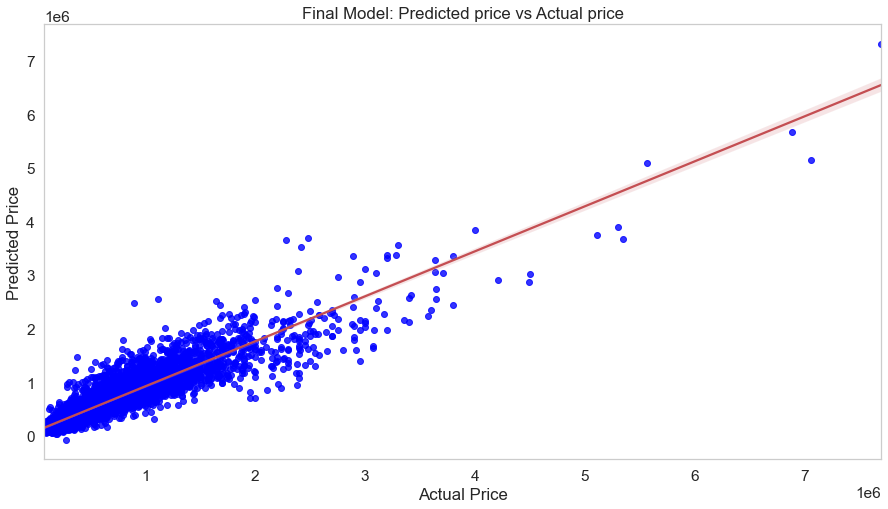

In [99]:
#Vertical distance between the points and the line denote the errors
fig, ax = plt.subplots(figsize=(15, 8))
ax= sns.regplot(x=y_train, y=y_pred_train_final, scatter_kws={"color": "blue"}, line_kws={"color": "r"})
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.set_title('Final Model: Predicted price vs Actual price');
#plt.savefig('train_final_model.png', dpi=100, bbox_inches='tight')

Text(0.5, 1.0, 'Predicted price vs Actual price')

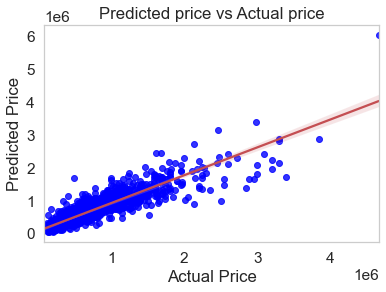

In [100]:
#Vertical distance between the points and the line denote the error
fig, ax = plt.subplots()
ax= sns.regplot(x=y_test, y=y_pred_test_final, scatter_kws={"color": "blue"}, line_kws={"color": "r"})
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.set_title('Predicted price vs Actual price')

> We have some outliers but overall, it looks like we have a linear relationship in the final model.

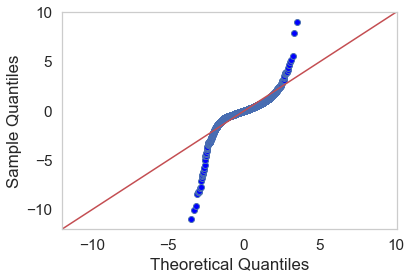

In [101]:
fig = sm.graphics.qqplot(test_residuals_final, dist=stats.norm, line='45', fit=True)

> Because of all the outliers, we are violating the normality assumption.


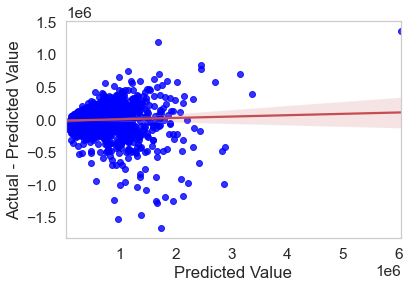

In [102]:
fig, ax = plt.subplots()
ax= sns.regplot(x=y_pred_test_final, y=test_residuals_final, scatter_kws={"color": "blue"}, line_kws={"color": "r"})
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

> This is not the worst "funnel" shape, but the residuals still aren't different enough to say that the predicted price follows strict homoscedasticity.

# Evaluation
The final model has room for improvement. It is off by almost 20% in predicting prices, which is not ideal. However, it is a huge improvement from our baseline model where it has only 50% accuracy in prediction. 


# Conclusion

In this project, we showed the relationships between the attributes of a house and its price. We also found out the key attributes that determine the house prices.

Based on our analysis, when investing in houses in King County, we recommend selecting the right zipcodes, a larger house footage and a higher grade to have a higher house price.

The next step for the further analysis would be including interaction regression in our model since a lot of the independent variables are highly correlated with each other. This will eliminate multicollinearity and improve accuracy of the model.